## Отчет
## Второе практическое задание
## по предмету "Основы математического моделирования"
## Студентки кафедры физики ускорителей и радиационной медицины
## Милош Ольги
## Вариант №7 

###  Постановка задачи:

Используя метод переменных направлений, решите краевую задачу:

\begin{equation}
 \left\{
\begin{aligned}
& \frac{\partial u}{\partial t} = \Delta u, 0<x<\frac{\pi}{2}, 0<y<\frac{\pi}{2}, t>0\\
& \frac{\partial u}{\partial x}\big|_{x=0}=\frac{\partial u}{\partial x}\big|_{x=\frac{\pi}{2}}=0\\
& \frac{\partial u}{\partial y}\big|_{y=0}=\frac{\partial u}{\partial y}\big|_{y=\frac{\pi}{2}}=0\\
& u\big|_{t=0}=cos4xcos2y
\end{aligned} \right. \label{eq1}
\end{equation}

###  Аналитическое решение задачи:

Ищем решение в виде:

$$\sum_{n=1}^{∞}\sum_{m=1}^{∞}T_{nm}(t)V_{nm}(x,y)$$


\begin{cases}{\triangle V + \lambda V =0} \\ V_{x}(0)=V_{x}(\frac{\pi }{2} )=0\\ V_{y}(0)=V_{y}(\frac{\pi }{2} )=0\end{cases}

$$\begin{cases}{T'_{nm}(t) + \lambda_{nm} T_{nm}(t) =0} \\ T(0)=1\end{cases}$$

С помощью метода разделения переменных получаем:

$$n=2, m=1$$

$$\lambda_{nm}=20$$

$$V_{nm}= cos(4x)cos(2y)$$


Тогда:

$$ T_{21}(t)=e^{-20t} $$

В итоге получаем аналитическое решение:

$$ U(x,y,t)=e^{-20t}cos(4x)cos(2y) $$

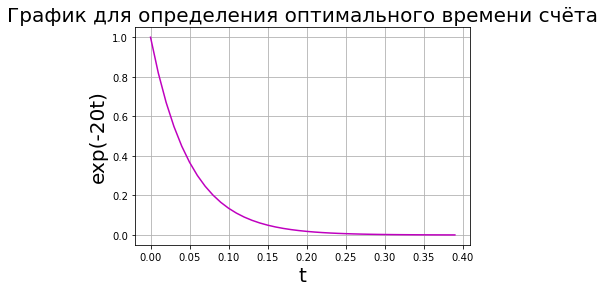

In [82]:
t = np.arange(0,0.4,0.01)
y = np.exp(-20*t)
plt.plot(t,y, 'm')
plt.title('График для определения оптимального времени счёта', fontsize = 20)
plt.xlabel("t", fontsize = 20)
plt.ylabel("exp(-20t)", fontsize = 20)
plt.grid()
plt.show()


Возьму максимальное время равное 0.3

## Численное решение 

## Метод переменных направлений 


Введем в рассчетной области двумерную пространственную и одномерную временную сетку:



$$x_{n}=nh_{x}, n= \overline{0,N}, Nh_{x}=\pi/2,\\ y_{m}=mh_{y},m= \overline{0,M}, Mh_{y}=\pi/2,\\t_{j}=j \tau, j=\overline{0,J}, J\tau=T$$

Заменим операторы $\frac{\partial ^{2} }{\partial   x^{2}}$ и $\frac{\partial ^{2} }{\partial   y^{2}}$ их разностными аналогами:


\begin{aligned}
&  \Lambda_{x}w_{n,m}^{j}=\frac{w^{j}_{n-1,m}-2w^{j}_{n,m}+w^{j}_{n+1,m}}{h_{x}^{2}},\\
&  \Lambda_{y}w_{n,m}^{j}=\frac{w^{j}_{n,m-1}-2w^{j}_{n,m}+w^{j}_{n,m+1}}{h_{y}^{2}},
\end{aligned} 

где использованы обозначения $ w^{j}_{n,m}= w(x_{n},y_{m},t_{j}).$

Для граничных условий Неймана введем аппроксимацию односторонней разностной производной:


\begin{aligned} &\frac{w_{1,m}^{j}-w_{0,m}^{j} }{h_{x}}= 0, \\ &\frac{w_{N,m}^{j}-w_{N-1,m}^{j} }{h_{x}}= 0, && m= \overline{0,M} ,j=\overline{0,J}. \end{aligned} 

\begin{aligned} &\frac{w_{n,1}^{j}-w_{n,0}^{j} }{h_{y}}= 0, \\ &\frac{w_{n,M}^{j}-w_{n,M-1}^{j} }{h_{y}}= 0, && n= \overline{0,N} ,j=\overline{0,J}. \end{aligned} 

А производная по времени: 

\begin{aligned} &\frac{w_{n,m}^{j+1}-w_{n,m}^{j} }{τ}= 0. \end{aligned} 

Теперь аппроксимируем уравнение теплопроводности из задачи следующим разностным уравнением:


\begin{align}
    &\ \dfrac{w^{j+1}_{n,m} - w^j_{n,m}}{\tau} = \Lambda (\delta w^{j+1}_{n,m} + (1 - \delta)w^j_{n,m}) 
\end{align}


При δ=0 мы получаем явную разностную схему, и решение во внутренних точках вычисляется по формуле:

\begin{equation}
    w^{j+1}_{n,m} = w^j_{n,m} + \tau (\Lambda_x w^j_{n,m} + \Lambda_y U^j_{n,m})
\end{equation}

При δ=1 мы получаем неявную разностную схему. Для определения Uk+1ij мы получаем на каждом шаге линейную систему:

\begin{equation}
    w^{j+1}_{n,m} - \tau (\Lambda_x w^{j+1}_{n,m} + \Lambda_y w^{j+1}_{n,m}) = w^j_{n,m}\end{equation}

Рассмотрим первый полуслой и будем решать задачу методом прогонки. Пусть имеется уравнение с начально-граничными условиями:


\begin{align}
    \begin{cases}
            A_i y_{i-1} - B_i y_i + C_i y_{i+1} = 0, \ |B_i|=|A_i| + |C_i| \label{eq:p2}\\ 
            y_0 = \alpha_{1} y_{1} + \beta_{1} , \ i = \overline{0, N} \\
            y_N = \alpha_2 y_{N-1} + \beta_2
    \end{cases}     
\end{align}

Пусть значение искомой функции в двух соседних точках связаны следующим линейным соотношением: $y_{i-1} = d_iy_i + \delta_i$


Тогда:

\begin{align}
    &\ A_i(d_i y_i + \delta_i) - B_i y_i + C_i y_{i+1} = 0 \\
    &\ (A_id_i - B_i)y_i = -C_i y_{i+1}  - \delta_i A_i \\
    &\ y_{i+1}\left[ (A_id_i - B_i)d_{i+1} + C_i \right] = - \delta_i A_i - (A_id_i - B_i)\delta_{i+1}
\end{align}

Для того, чтобы это соотношение было верно для любых $y_{i}+1$ нужно, чтобы выражение в квадратных скобках и правая часть было равны нулю. Приравнивая их нулю, получаем рекуррентные формулы для определения прогоночных коэффициентов:

\begin{equation}
    d_{i+1} = \dfrac{C_i}{B_i - A_i d_i}, \;\;\;\;\;\; \delta_{i+1} = \dfrac{- \delta_i A_i}{A_id_i - B_i}
\end{equation}

Сравнивая граничные условия задачи с выражением $y_{i-1} = d_iy_i + \delta_i$, находим $d_1 = \alpha_1,\delta_1 = \beta_1$

Используя эти значения $d_1$ и $\delta_1$, совершим прогонку в направлении возрастания индекса, последовательно определяя значения коэффициентов $d_i$ и $δ_i$

Также нетрудно получить рекуррентные соотношения для $y_{N-1}$ и $y_N:y_{N-1} = d_N y_N + \delta_N$  и $y_N = \alpha_2 y_ {N-1} + \beta_2$.  Из этих соотношений получаем:

\begin{equation}
    y_{N-1} = d_n y_N + \delta_N = d_N(\alpha_2y_{N-1} + \beta_2) + \delta_N  \;\;\;\; \implies \;\;\;\; y_N = \dfrac{\alpha_2 \delta_N + \beta_2}{1 - d_N \alpha_2} \label{eq:p3}     
\end{equation}

При $d_1=α_1$ и условиях, наложенных при постановке задачи на $B_{i},A_{i},C_{i},α_{1,2}$ получаем, что знаменатель в выражении с $y_{N}$ положительный. Следовательно значение $y_{N}$ определено.

Используя найденное значение $y_N$ , делаем обратную прогонку в сторону
уменьшающихся значений индекса, поледовательно определяя значения $y_i$.


## Достаточные условия применения метода прогонки

$$\begin{cases}
            \dfrac{0.5\tau}{h_x^2}w^{j + \frac{1}{2}}_{(n+1),m} - (1 + \dfrac{\tau}{h_x^2})w^{j + \frac{1}{2}}_{n,m} + \dfrac{0.5\tau}{h_x^2}w^{j + \frac{1}{2}}_{(n-1),m} = 0 \\
            \dfrac{w^j_{1,m} - w^k_{0,m}}{h_x} = 0 \\
            \dfrac{{w^j_{N,m}} - w^j_{(N-1),m}}{h_x} = 0 
\end{cases}$$

$$\begin{cases}
            \dfrac{0.5\tau}{h_y^2}w^{j + 1}_{n,m+1} - (1 + \dfrac{\tau}{h_y^2})w^{j + 1}_{n,m} + \dfrac{0.5\tau}{h_y^2}w^{j + 1}_{n,m-1} = 0 \\
            \dfrac{w^j_{n,1} - w^k_{n,0}}{h_y} = 0 \\
            \dfrac{{w^j_{n,M}} - w^j_{n,M-1}}{h_y} = 0 
\end{cases}$$

Перепишем исходные системы в виде:


\begin{cases}\frac{0.5 \tau}{h_{x}^{2}}x_{n-1} - (1+\frac{\tau }{h_{x}^{2}})x_{n}+\frac{0.5 \tau}{h_{x}^{2}}x_{n+1}=0 \\x_{1}= x_{0} \\ x_{N}= x_{N-1}  \end{cases}

\begin{cases}\frac{0.5 \tau}{h_{y}^{2}}y_{m-1} - (1+\frac{\tau }{h_{y}^{2}})y_{m}+\frac{0.5 \tau}{h_{y}^{2}}y_{m+1}=0 \\y_{1}= y_{0} \\ y_{M}= x_{M-1}  \end{cases}

Согласно достаточному условию применения метода прогонки, достаточно,
чтобы выполнялись следующие условия:

\begin{equation}
    |B_i|\geq|A_i| + |C_i| , \;\;\; \alpha_{1,2} \in [0, 1], \;\;\;\; i = \overline{1, N}
\end{equation}

где :\begin{align}
    A_n = C_n = \dfrac{0.5\tau}{h_x^2},\;\;\;\;\; B_n = (1 + \dfrac{\tau}{h_x^2}),\\ 
    A_m = C_m = \dfrac{0.5\tau}{h_y^2},\;\;\;\;\; B_m = (1 + \dfrac{\tau}{h_y^2}),  \\ 
\end{align}

Видно, что выполняется условие для обоих систем. Таким образом, для
нашей разностной схемы, которая применяется для численного решения
задачи, выполнено достаточное условие применимости метода прогонки.


Cхема переменных направлений имеет погрешность аппроксимации
$O(h^{2}_{x}) + O(h^{2}_{y}) + O(τ^{2})$, а значит, в силу линейности и безусловной устойчивости, она сходится и имеет второй порядок точности по координатам и времени. Так как для ее реализации требуется число действий, пропорциональное числу узлов сетки, схема является экономичной.

In [1]:
import numpy as np                               
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [83]:
T = 0.3
a = 0.
b = np.pi/2.
c = 0.
d = np.pi/2.
N = 100 # x
M = 100 # y
J = 100 # t

hx = (b - a)/(N - 2)
hy = (d - c)/(M - 2)
tau = T/(J - 1)

In [84]:
x = np.zeros(N)
t = np.zeros(J)
y = np.zeros(M)

w = np.zeros((N, M, 2*J))
u = np.zeros(((J, N, M)))

In [85]:
for i in range(N):
    x[i] = a - hx/2 + i*hx
for i in range(M):
    y[i] = c - hy/2 + i*hy
for i in range(J):
    t[i] = tau*i
for n in range(N):
    for m in range(M):
        w[n, m, 0] = math.cos(4*x[n])*math.cos(2*y[m])
        u[0, n, m] = math.cos(4*x[n])*math.cos(2*y[m])

In [86]:
for j in range(2*J-1):
    if(j%2==0):
        ai = np.zeros(N)
        bi = np.zeros(N)
        ci = np.zeros(N)
        di = np.zeros(N)
        bi[0] = 1.
        ci[0] = -1.
        for i in range(1, N-1):
            ai[i] = tau/hx**2/2
            bi[i] = -(1. + tau/hx**2)
            ci[i] = tau/hx**2/2
        bi[N-1] = 1.
        ai[N-1] = -1.
        ksi = np.zeros(N+1)
        etta =  np.zeros(N+1)
        for m in range (1, M-1):
            for n in range(1, N-1):
                di[n] = -(w[n,m,j] + tau/hy**2/2*(w[n,m+1,j]-2*w[n,m,j]+w[n,m-1,j]))
            for i in range(N):
                ksi[i+1] = ci[i]/(-bi[i]-ai[i]*ksi[i])
                etta[i+1] = (ai[i]*etta[i]-di[i])/(-bi[i]-ai[i]*ksi[i])
            w[N-1, m, j+1] = etta[N]
            for i in range(N-2, -1, -1):
                w[i, m, j+1] = ksi[i+1]*w[i+1, m, j+1]+etta[i+1]
    if(j%2==1):
        ai = np.zeros(M)
        bi = np.zeros(M)
        ci = np.zeros(M)
        di = np.zeros(M)
        bi[0] = 1.
        ci[0] = -1.
        for i in range(1, M-1):
            ai[i] = tau/hy**2/2
            bi[i] = -(1. + tau/hy**2)
            ci[i] = tau/hy**2/2
        bi[M-1] = 1.
        ai[M-1] = -1.
        ksi = np.zeros(M+1)
        etta =  np.zeros(M+1)
        for n in range (1, N-1):
            for m in range(1, M-1):
                di[m] = -(w[n,m,j] + tau/hx**2/2*(w[n+1,m,j]-2*w[n,m,j]+w[n-1,m,j]))
            for i in range(M):
                ksi[i+1] = ci[i]/(-bi[i]-ai[i]*ksi[i])
                etta[i+1] = (ai[i]*etta[i]-di[i])/(-bi[i]-ai[i]*ksi[i])
            w[n, M-1, j+1] = etta[M]
            for i in range(M-2, -1, -1):
                w[n, i, j+1] = ksi[i+1]*w[n, i+1, j+1]+etta[i+1]
            for m in range(M):
                w[0,m,j+1] = w[1,m,j+1]
                w[N-1,m,j+1] = w[N-2,m,j+1]
        for n in range (N):
            for m in range (M):
                k = int((j+1)/2)
                u[k, n, m] = w[n, m, j+1]

In [87]:
x[0] = 0
x[N-1] = np.pi/2.
y[0] = 0
y[M-1] = np.pi/2.
for n in range(N):
    for m in range(M):
        u[0, n, m] = math.cos(4*x[n])*math.cos(2*y[m])

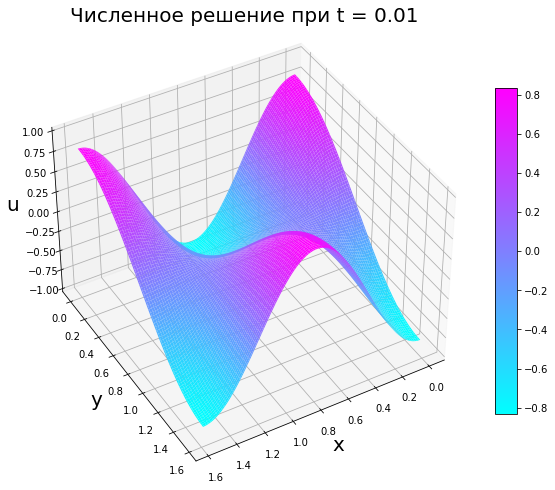

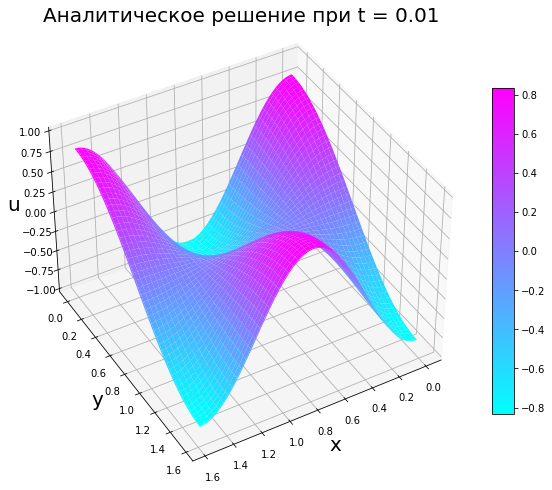

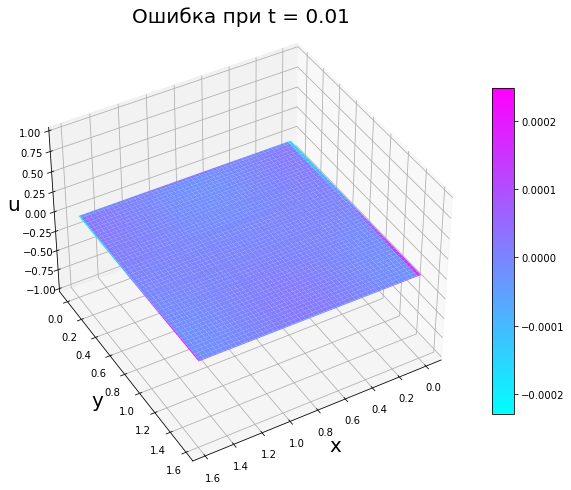

In [92]:
X = np.zeros((N, M))
Y = np.zeros((N, M))

for i in range(N):
    for j in range(M):
        X[i,j] = x[i]
        Y[i,j] = y[j]



fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u[int(J/30.),:,:],cmap='cool',rstride=1,cstride=1,linewidth=0.1)
ax.set_title('Численное решение при t = 0.01', color='black',fontstyle = 'normal', fontsize=20)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y ',fontsize=20)
ax.set_zlabel('u ',fontsize=20)
ax.set_zlim3d(-1, 1)
fig.colorbar(surf, shrink=0.6, aspect=15)
ax.view_init(40, 60)

plt.show()


U = np.zeros((J, N, M))
for j in range(J):
    for n in range(N):
        for m in range(M):
            U[j,n,m] =math.exp(-20*t[j])*math.cos(4*x[n])*math.cos(2*y[m])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U[int(J/30.),:,:],cmap='cool')
ax.set_title('Аналитическое решение при t = 0.01', color='black',fontstyle = 'normal', fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('u', fontsize=20)
ax.set_zlim3d(-1, 1)
fig.colorbar(surf, shrink=0.6, aspect=15)
ax.view_init(40, 60)
plt.show()


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u[int(J/30.),:,:] - U[int(J/30.),:,:],cmap='cool')
ax.set_title('Ошибка при t = 0.01', color='black',fontstyle = 'normal', fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('u', fontsize=20)
fig.colorbar(surf, shrink=0.6, aspect=15)
ax.set_zlim3d(-1, 1)
ax.view_init(40, 60)
plt.show()


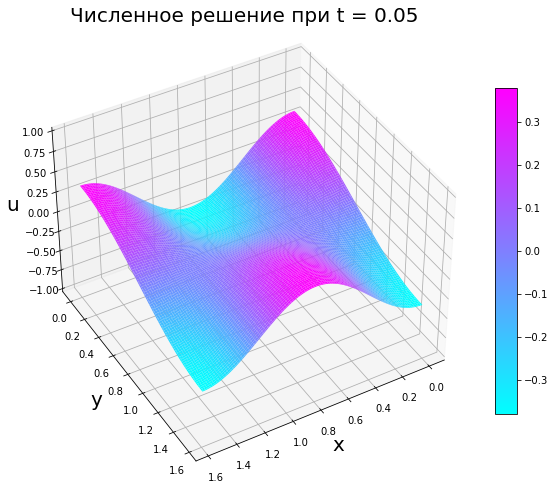

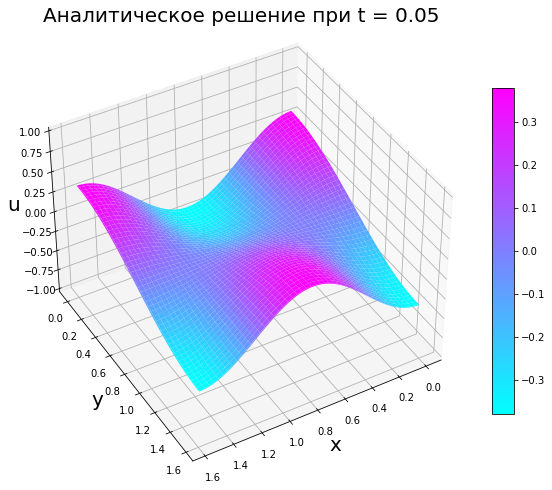

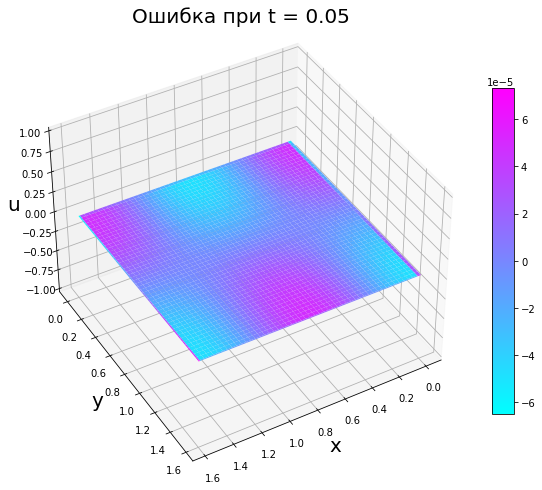

In [93]:
X = np.zeros((N, M))
Y = np.zeros((N, M))

for i in range(N):
    for j in range(M):
        X[i,j] = x[i]
        Y[i,j] = y[j]



fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u[int(J/6.),:,:],cmap='cool',rstride=1,cstride=1,linewidth=0.1)
ax.set_title('Численное решение при t = 0.05', color='black',fontstyle = 'normal', fontsize=20)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y ',fontsize=20)
ax.set_zlabel('u ',fontsize=20)
ax.set_zlim3d(-1, 1)
fig.colorbar(surf, shrink=0.6, aspect=15)
ax.view_init(40, 60)

plt.show()


U = np.zeros((J, N, M))
for j in range(J):
    for n in range(N):
        for m in range(M):
            U[j,n,m] =math.exp(-20*t[j])*math.cos(4*x[n])*math.cos(2*y[m])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U[int(J/6.),:,:],cmap='cool')
ax.set_title('Аналитическое решение при t = 0.05', color='black',fontstyle = 'normal', fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('u', fontsize=20)
ax.set_zlim3d(-1, 1)
fig.colorbar(surf, shrink=0.6, aspect=15)
ax.view_init(40, 60)
plt.show()


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u[int(J/6.),:,:] - U[int(J/6.),:,:],cmap='cool')
ax.set_title('Ошибка при t = 0.05', color='black',fontstyle = 'normal', fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('u', fontsize=20)
fig.colorbar(surf, shrink=0.6, aspect=15)
ax.set_zlim3d(-1, 1)
ax.view_init(40, 60)
plt.show()



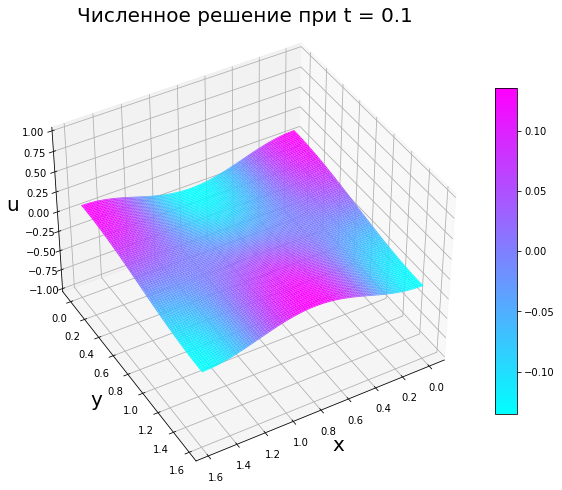

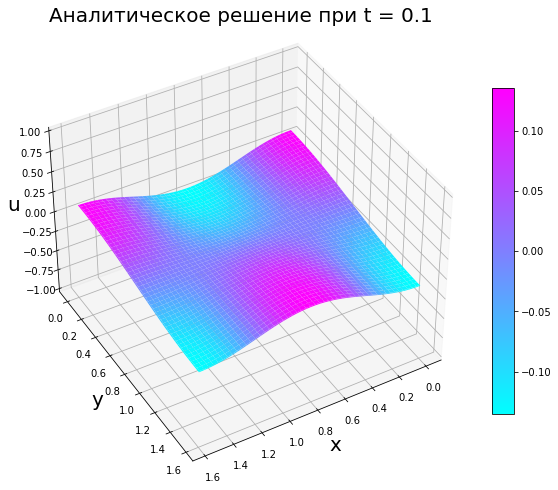

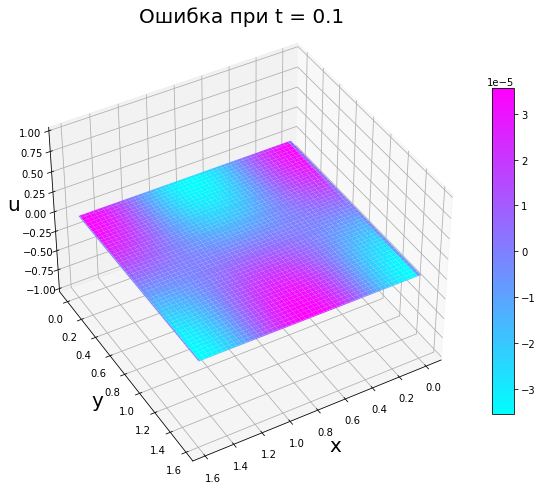

In [91]:
X = np.zeros((N, M))
Y = np.zeros((N, M))

for i in range(N):
    for j in range(M):
        X[i,j] = x[i]
        Y[i,j] = y[j]



fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u[int(J/3.),:,:],cmap='cool',rstride=1,cstride=1,linewidth=0.1)
ax.set_title('Численное решение при t = 0.1', color='black',fontstyle = 'normal', fontsize=20)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y ',fontsize=20)
ax.set_zlabel('u ',fontsize=20)
ax.set_zlim3d(-1, 1)
fig.colorbar(surf, shrink=0.6, aspect=15)
ax.view_init(40, 60)

plt.show()


U = np.zeros((J, N, M))
for j in range(J):
    for n in range(N):
        for m in range(M):
            U[j,n,m] =math.exp(-20*t[j])*math.cos(4*x[n])*math.cos(2*y[m])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U[int(J/3.),:,:],cmap='cool')
ax.set_title('Аналитическое решение при t = 0.1', color='black',fontstyle = 'normal', fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('u', fontsize=20)
ax.set_zlim3d(-1, 1)
fig.colorbar(surf, shrink=0.6, aspect=15)
ax.view_init(40, 60)
plt.show()


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u[int(J/3.),:,:] - U[int(J/3.),:,:],cmap='cool')
ax.set_title('Ошибка при t = 0.1', color='black',fontstyle = 'normal', fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('u', fontsize=20)
fig.colorbar(surf, shrink=0.6, aspect=15)
ax.set_zlim3d(-1, 1)
ax.view_init(40, 60)
plt.show()

